In [1]:
import pandas as pd
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from ulvq import ULVQ  
import numpy as np

import warnings
warnings.filterwarnings("ignore")


In [2]:
# Load the Iris dataset
iris = datasets.load_iris()
X, y_true = iris.data, iris.target

# Randomly select two features
selected_features = np.random.choice(X.shape[1], 2, replace=False)
X_selected = X[:, selected_features]

# Create a DataFrame for better visualization
iris_df = pd.DataFrame(data=X_selected, columns=[iris.feature_names[i] for i in selected_features])
iris_df['Target'] = y_true

In [3]:
# Display the first few rows of the dataset
print("Iris Dataset (Randomly Selected Features):")
print(iris_df.head())

Iris Dataset (Randomly Selected Features):
   sepal width (cm)  petal length (cm)  Target
0               3.5                1.4       0
1               3.0                1.4       0
2               3.2                1.3       0
3               3.1                1.5       0
4               3.6                1.4       0


In [4]:
# Preprocessing: Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_selected)

In [14]:
# Clustering using ULVQ
ulvq = ULVQ(n_clusters=3, learning_rate=0.3)
ulvq.fit(X_scaled, n_epochs=5000)

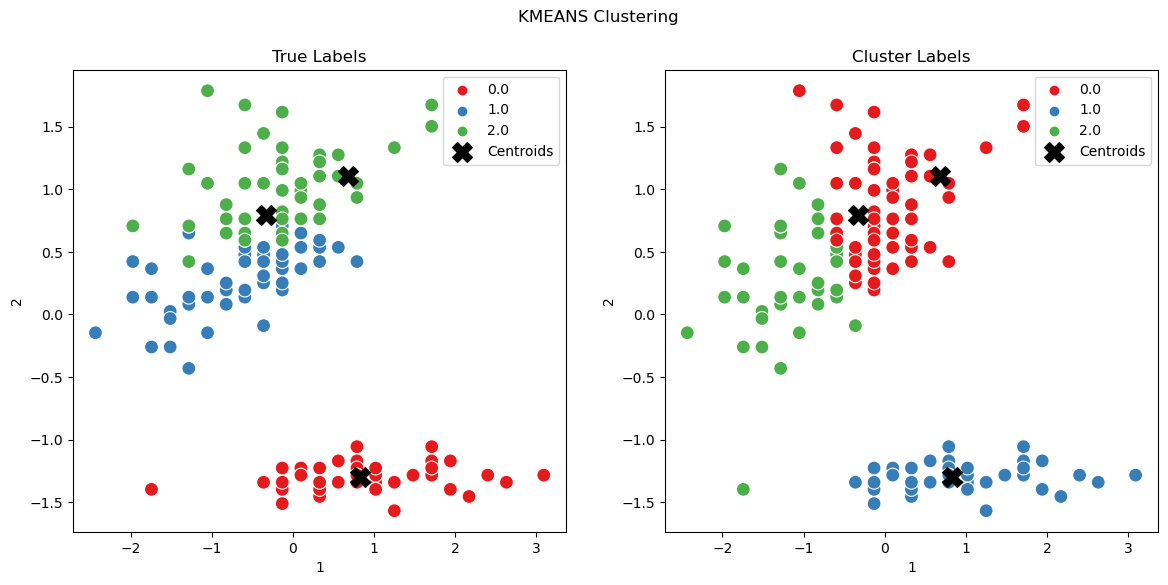

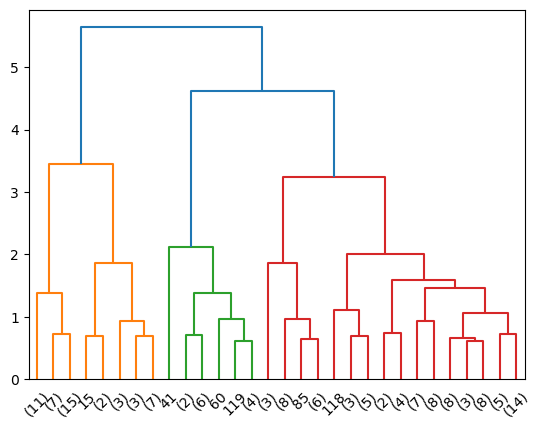

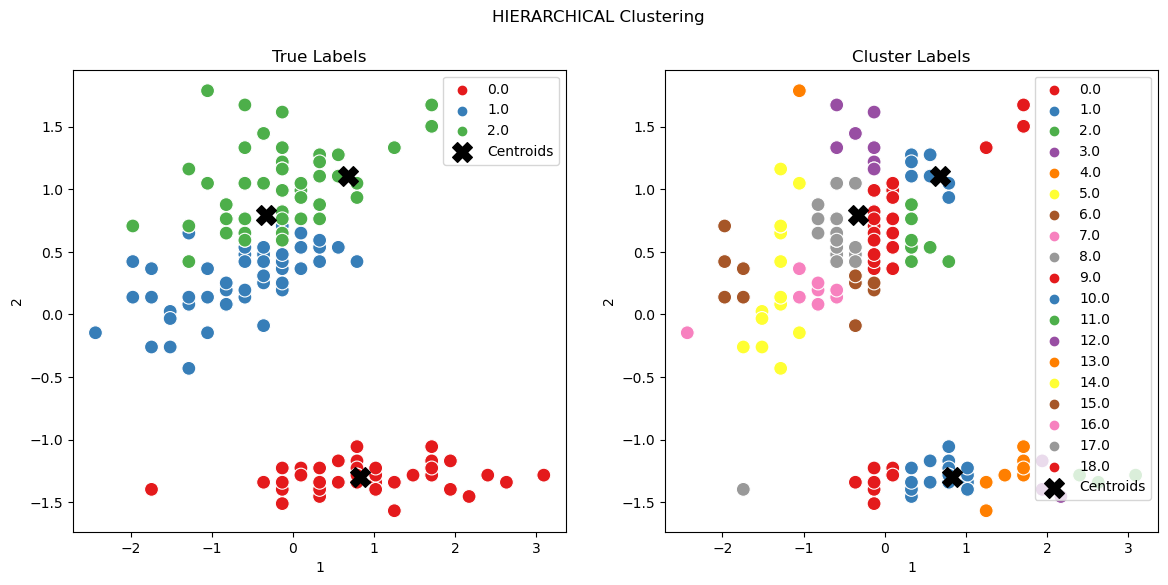

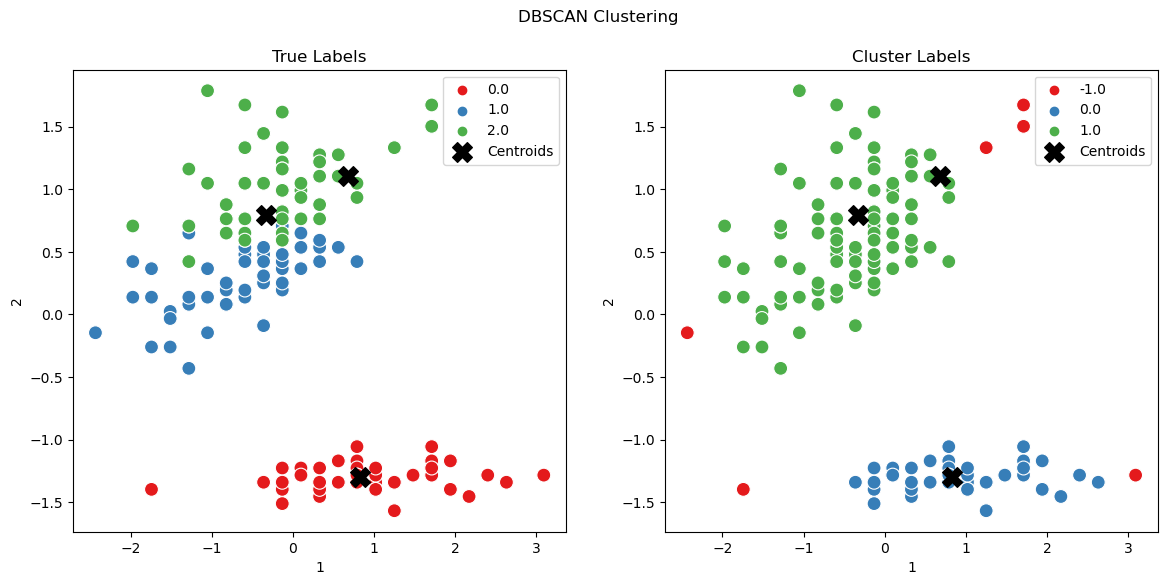

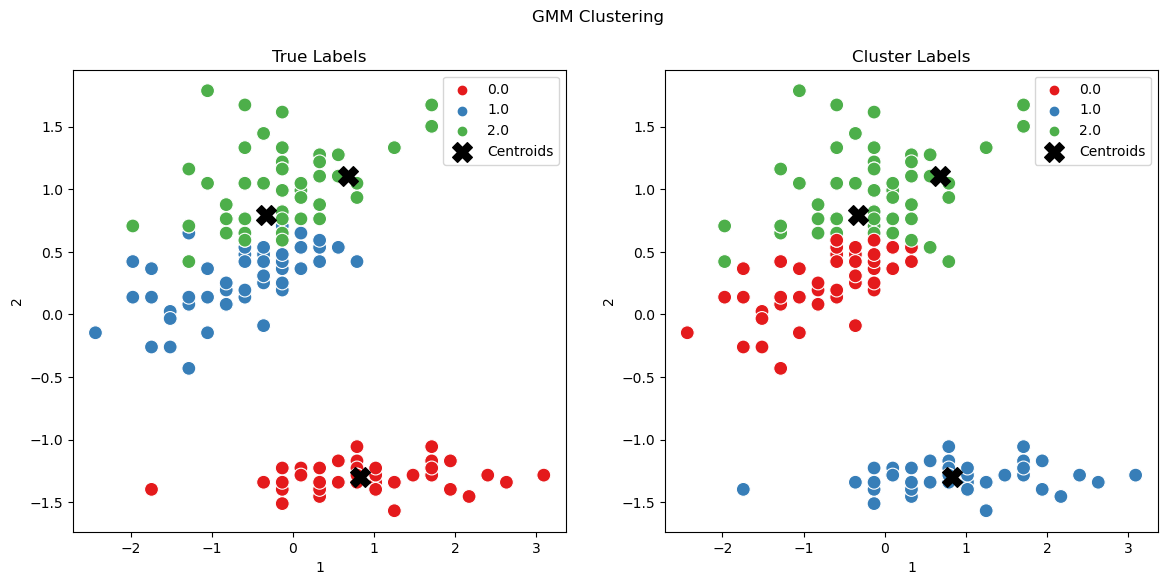

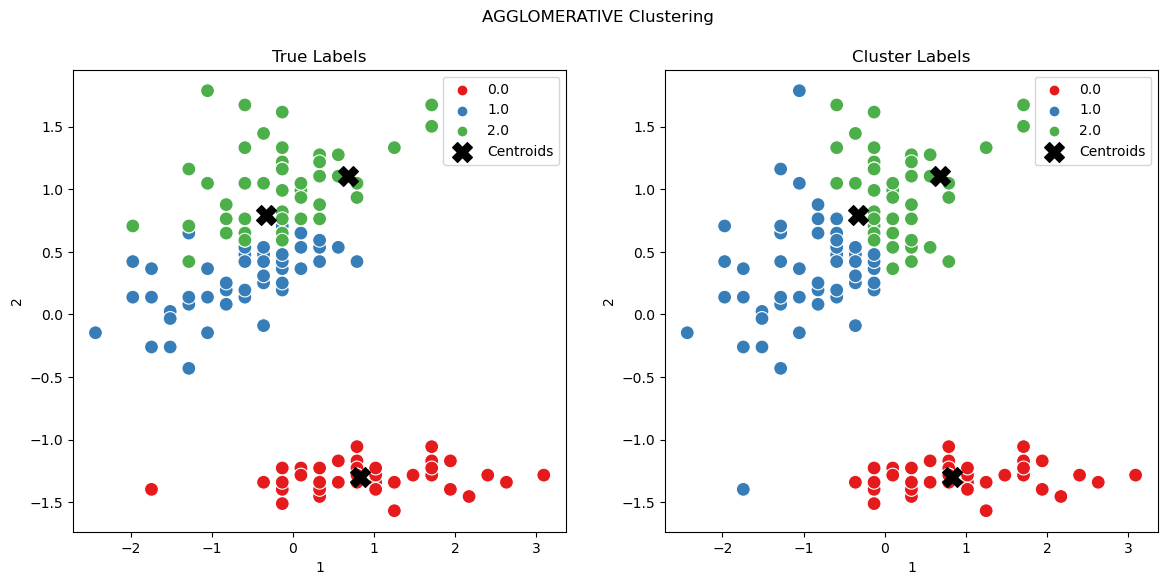

,v_measure,silhouette,davies_bouldin,calinski_harabasz
0,0.643923,0.431089,0.723859,171.915681


,accuracy,adjusted_rand,normalized_mutual_info
0,0.726667,0.544069,0.643923


In [23]:
for clm in ['kmeans', 'hierarchical', 'dbscan', 'gmm', 'agglomerative']:
    # Clustering with each evaluation technique 
    clustering = ulvq.label_clusters(X_scaled, clm)
    ulvq.visualize_clusters(X_scaled, y_true, clustering, feature_names=selected_features, title=f"{clm.upper()} Clustering")
ulvq.evaluate_clustering(X_scaled, y_true, display_all='True')
ulvq.evaluate_labeling(X_scaled, y_true, display_all='True')